# Поиск фрагмента в тексте: алгоритмы Рабина-Карпа и Кнута-Морриса-Пратта


Поиск подстроки в строке - это процесс обнаружения наличия одной строки (подстроки) внутри другой строки (текста). Целью является выявление позиций, где начинается подстрока в тексте. Этот процесс часто используется в обработке строк для поиска конкретного фрагмента текста или определения наличия определенного образца в строке.

## Прямой поиск (naive, brute-force)

Алгоритм начинается со сравнения первого символа строки с первым символом подстроки, в случае совпадения сравниваются следующие символы строки и подстроки, в случае несовпадения происходит сдвиг рассматриваемого окна вправо. Алгоритм повторяется до тех пор, пока искомая подстрока не будет найдена.

Недостатки алгоритма:

1. высокая сложность — O(N*M), в худшем случае – Θ((N-M+1)*M);
2. после несовпадения просмотр всегда начинается с первого символа подстроки и поэтому может включать символы строки, которые ранее уже просматривались;
3. информация о строке, полученная на предыдущих шагах, никак не используется при проверке последующих сдвигов.

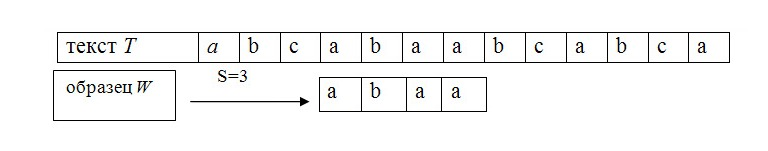

## Алгоритм Д. Кнута, Д. Мориса и В. Пратта

При нахождении первого несовпадающего символа строки и подстроки, сдвиг окна происходит на расстрояние, равное значению префикс-функции для этого символа.

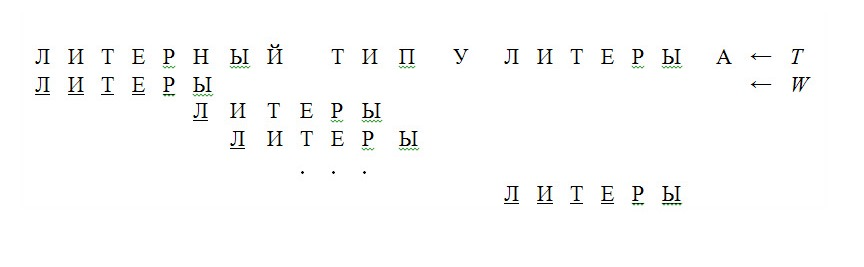

#### Определение префикс функции

Дана строка $s[0 \ldots n-1]$. Префикс-функция - это массив чисел $\pi[0 \ldots n-1]$, где $\pi[i]$ определяется следующим образом: это такая наибольшая длина наибольшего собственного суффикса подстроки $s[0 \ldots i]$, совпадающего с её префиксом:

$\pi [i] = max_{k=0...i} \{k: s[0...k-1]\ = s[i - k + 1...i]\}$

Например, для строки "abcabcd" префикс-функция равна: [0, 0, 0, 1, 2, 3, 0]:

* у строки "a" нет нетривиального префикса, совпадающего с суффиксом;
* у строки "ab" нет нетривиального префикса, совпадающего с суффиксом;
* у строки "abc" нет нетривиального префикса, совпадающего с суффиксом;
* у строки "abca" префикс длины 1 совпадает с суффиксом;
* у строки "abcab" префикс длины 2 совпадает с суффиксом;
* у строки "abcabc" префикс длины 3 совпадает с суффиксом;
* у строки "abcabcd" нет нетривиального префикса, совпадающего с суффиксом.

#### Алгоритм вычисления префикс функции за О(m)


1. Считать значения префикс-функции $\pi[i]$ будем по очереди: от $i=1$ к $i=n-1$ (значение $\pi[0]$ просто присвоим равным нулю).
2. Для подсчёта текущего значения $\pi[i]$ мы заводим переменную $j$, обозначающую длину текущего рассматриваемого образца. Изначально $j = \pi[i-1]$.
3. Тестируем образец длины j, для чего сравниваем символы $s[j]$ и $s[i]$. Если они совпадают — то полагаем $\pi[i] = j+1$ и переходим к следующему индексу $i+1$. Если же символы отличаются, то уменьшаем длину $j$, полагая её равной $\pi[j-1]$, и повторяем этот шаг алгоритма с начала.
4. Если мы дошли до длины $j=0$ и так и не нашли совпадения, то останавливаем процесс перебора образцов и полагаем $\pi[i] = 0$ и переходим к следующему индексу $i+1$.



#### Сложность КМП алгоритма


1. требуется порядка O(N+M) сравнений символов для получения результата;
2. схема КМП-поиска дает подлинный выигрыш только тогда, когда неудаче предшествовало некоторое число совпадений. Лишь в этом случае образ сдвигается более чем на единицу. К несчастью совпадения встречаются значительно реже чем несовпадения. Поэтому выигрыш от КМП-поиска в большинстве случаев текстов весьма незначителен.

## Алгоритм Рабина-Карпа

Сокращаем количество сравнений засчет использования кольцевой хэш-функции. 

Вычисляем хэш-код искомой подстроки.
Начиная с первого символа, считаем хэш-код отрезка, равного длине подстроки. Если они совпадают, убеждаемся в эквивалетности строк и возвращаем полученную позицию. В противном случае сдвигаем окно на один символ.


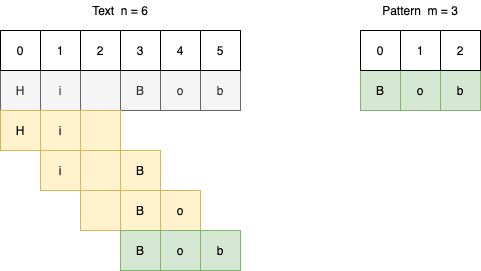

* Худшая сложность: О(m*n), когда коллизия происходит на каждом шаге
* Средняя и лучшая сложность: О(n), когда коллизия не произошла ни разу



#### Кольцевая хэш-функция

Кольцевой хэш  — хэш-функция, обрабатывающая вход в рамках некоторого окна. Получение значения хэш-функции для сдвинутого окна в таких функциях является дешевой операцией: для пересчета значения требуется знать лишь предыдущее значение хэша; значение входных данных, которые остались за пределами окна; и значение данных, которые попали в окно.

#### Полиномиальная хэш-функция

Вычисление:

$h(s[1\ldots m]) = (\sum_{i=1}^{m}s[i] \times x^{m-i})\mod q$

Здесь: 
* $s[i]$ - числовое представление символа в строке $s$ на позиции $i$.
* $q$ - целое простое положительное число
* $x$ - любое положительное целое число, меньше $q$

Покажем, что она кольцевая:

$h(s[1, 2, 3]) = (s[1] \times x^{2} + s[2] \times x^{1} + s[3] \times x^{0}) \mod q$

$h(s[2, 3, 4]) = (s[2] \times x^{2} + s[3] \times x^{1} + s[4] \times x^{0}) \mod q$

Таким образом,

$h(s[2, 3, 4]) = (( h(s[1, 2, 3]) - s[1] \times x^{2} ) \times x + s[4] ) \mod q$


#### Схема Горнера

Вычисление возведения в степень может быть дорогой.
Воспользуемся методом Горнера.

Схема Горнера для деления многочлена - это алгоритм упрощения вычисления значения многочлена $Р(x)$ при определённой величине $x = x0$ методом деления многочлена на одночлены (многочлены 1-ой степени). Каждый одночлен включает в себя максимум один процесс умножения и один процесс сложения.

$P(x) = a_{0} + a_{1} \times x + a_{2} \times x^{2} + a_{3} \times x^{3} + ... + a_{n} \times x^{n}$

$P(x) = a_{0} + x (a_{1} + x (a_{1} + x (a_{2} + x (a_{3} + a_{n} \times x^{n-3} ))))$

## Реализация алгоритмов

In [1]:
from algorithms import naive_search, knuth_morris_pratt_search, rabin_karp_search

from validation.test import run_tests
from benchmark import generate_benchmark_data, run_bechmark
from plot.graph import plot_complexity, plot_distr_by_substring_ratio

## Проверка корректности работы

In [2]:
exit_code = run_tests(algorithms=[naive_search, 
                                  rabin_karp_search, 
                                  knuth_morris_pratt_search])
assert not exit_code

## Генерация данных для сравнения эффективности

Для проверки эффективности алгоритмов проведем стресс-тест на большом количестве данных.

Для этого сгенерируем 1100 строк длиной от 100 до 1000, при этом учтем включение следующих случаев:
* подстрока составляет 0, 10, 20, 30, ..., 100 процентов от строки.

In [8]:
benchmark_data = generate_benchmark_data()

100%|██████████| 10/10 [00:00<00:00, 49.50it/s]


Количество сгенерированных пар:

In [54]:
benchmark_data.shape[0]

1100

Взглянем на примеры:

In [53]:
for row in benchmark_data.loc[[62, 50, 32]].iterrows():
    msg = f'Строка: {row[1].string}\nПодстрока: {row[1].substring}\n'
    print(msg)

Строка: llilillullallilillilillallullilillallu
Подстрока: lilillullallilillililla

Строка: llilillullallallilillallullullullu
Подстрока: lilillullallallil

Строка: llullallallallallullullallilillili
Подстрока: lallallalla



Убедимся, что распределение длин строк равномерное.

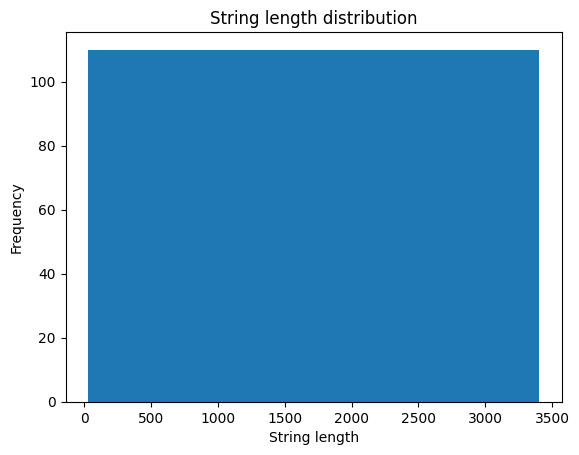

In [26]:
benchmark_data.string_length.plot.hist(title='String length distribution',
                                       xlabel='String length');

Убедимся, что распределение доли, занимаемой подстрокой, также равномерно:

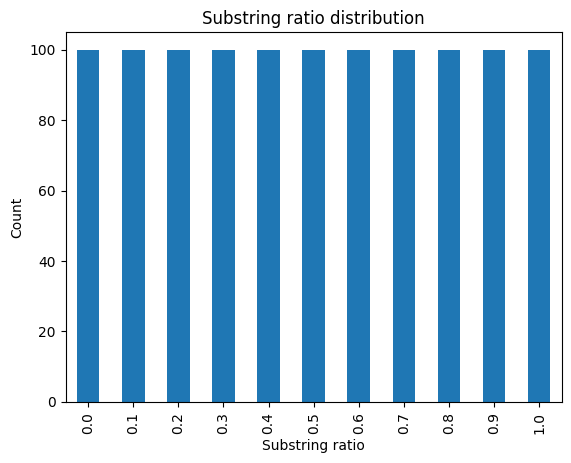

In [34]:
(benchmark_data.substring_length / benchmark_data.string_length).apply(
    lambda x: round(x, 1)
).value_counts().plot.bar(title='Substring ratio distribution',
                          xlabel='Substring ratio',
                          ylabel='Count');

Замерим время работы каждого из алгоритмов на сгенерированных данных

In [3]:

benchmark_results = run_bechmark(data=benchmark_data, 
                                 algorithms=[naive_search, 
                                             rabin_karp_search, 
                                             knuth_morris_pratt_search])

100%|██████████| 1100/1100 [00:01<00:00, 600.11it/s]


## Сравнение эффективности

### Сложность относительно длины строки

Сложности наивного алгоритма и алгоритма Рабин-Карпа выглядят похожим образом за тем исключением, что коэффициент сложности наивного алгоритма выше: действительно, оба алгоритма на при несовпадении паттерна и подстроки делают шаг на один элемент, однако в случае с алгоритмом Рабина-Карпа один шаг включает в себя меньшее количество операций за счет использования кольцевой хэш-функции.

Для КМП алгоритма зависимость времени выполнения от размера строки имеет более линейную форму в худшем случае за счет переиспользования информации, полученной на предыдущих шагах: с каждым новым шагом алгоритм осуществляет одну операцию сравнения. 

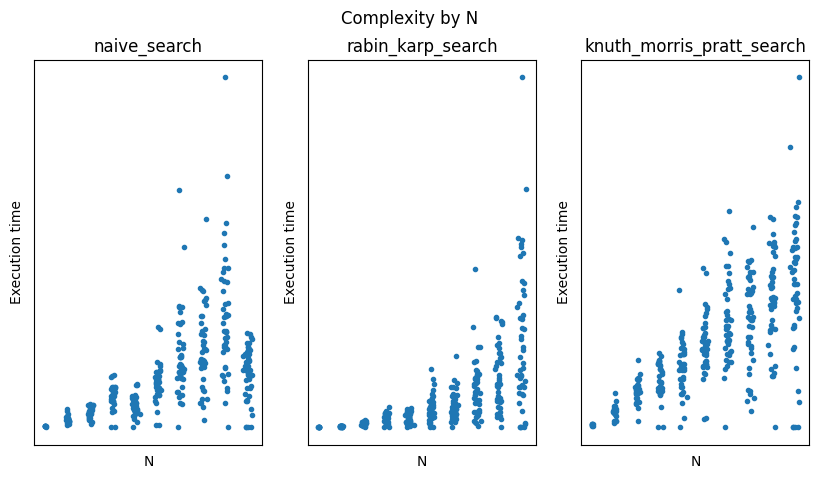

In [58]:
plot_complexity(parameter='N', benchmark_results=benchmark_results)

### Сложность относительно длины подстроки

Для алгоритма РК в лучшем случае зависимость имеет почти константную форму: действительно, вне зависимости от длины подстроки, пересчет хэш-значения включает фиксированное количество операций. 

Для наивного алгоритма зависимость в лучшем случае имеет линейную форму, поскольку пропорционально увеличивает количество операций сравнения. То же касается алгоритма КМП за тем исключением, что здесь коэффициент выше, что обусловлено дополнительными операциями, требуемыми на подсчет префикс-функции.

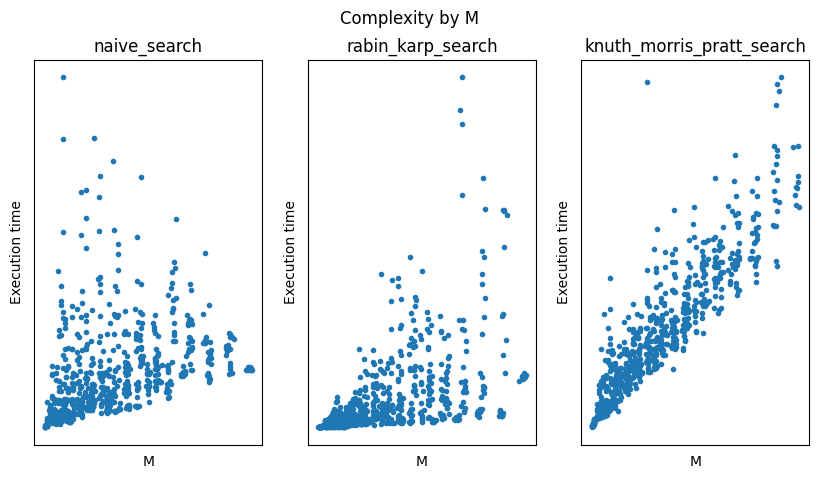

In [59]:
plot_complexity(parameter='M', benchmark_results=benchmark_results)

### Сложность относительно суммы длин строки и подстроки

Видим, что зависимость алгоритма КМП имеет выраженную линейную форму с равномерным разбросом (из-за позиции подстроки в строке), что подтверждает, что его сложность составляет О(M + N).

Алгоритм РК в большинстве случаев так же имеет выраженную линейную тенденцию, причем с меньшим коэффициентом, чем алгоритм КМП, однако в худшем случае его сложность не вписывается в линейную зависимость, что подтверждает, что его ожидаемая сложность О(M + N), а худшая сложность больше. 

Наивный алгоритм быстрее демонстрирует отклонение от линейного, подтверждая, что его худшая сложность больше.

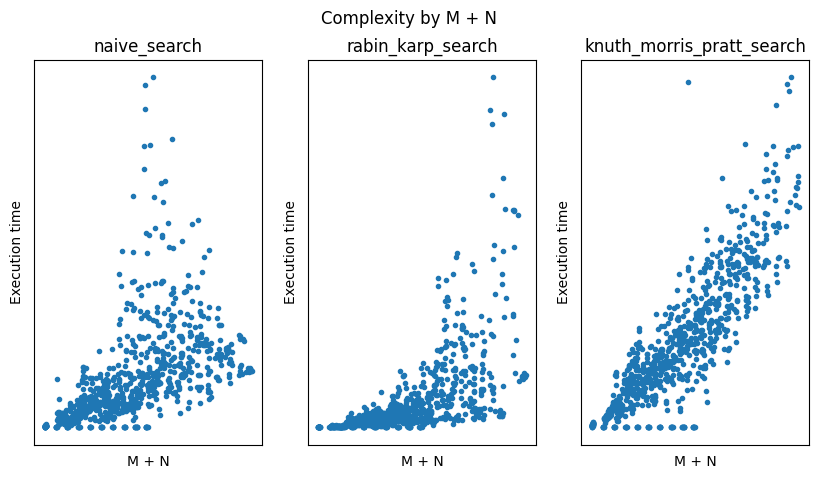

In [61]:
plot_complexity(parameter='M + N', benchmark_results=benchmark_results)

### Сложность относительно произведения длин строки и подстроки


Наивный алгоритм демонстрирует линейную зависимость от произведения с очень большим и равномерным разбросом, за который влияет позиция подстроки в строке.

РК алгоритм в ряде случаев демонстрирует линкйную зависимость от произведения, но большинство случаев концентрируются ниже, что указывают, что средняя сложность алгоритма лучше, чем произведение.

Алгоритм КМП имеет выраженно нелинейную завимимость, однозначно указывающую на то, что его сложность лучше произведения.

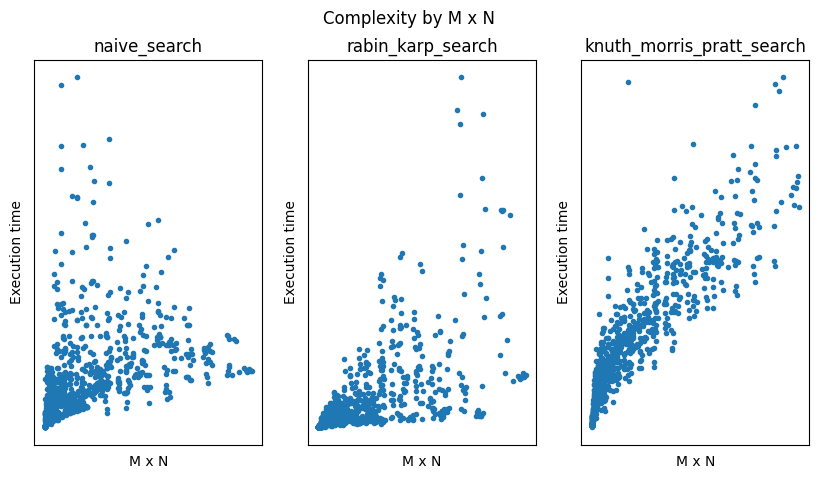

In [62]:
plot_complexity(parameter='M x N', benchmark_results=benchmark_results)

#### Зависимость скорости поиска от доли длины подстроки в длине строки

Наивный алгоритм практически не зависит от доли: большая длины подстроки увеличивает количество шагов во внутреннем цикле пропорционально уменьшению количеству шагов во внешнем цикле.


Для алгоритма КМП увеличение длины подстроки увеличивает время, затрачиваемое на подсчет префикс функции, и слабее влияет на количество итераций по строке.

Для РК алгоритма рост подстроки увеличивает количество вычислений, требуемых для подсчета хэш-кода, но в какой-то момент связанное с этим уменьшение количества шагов по строке начинает компенсировать эти затраты.


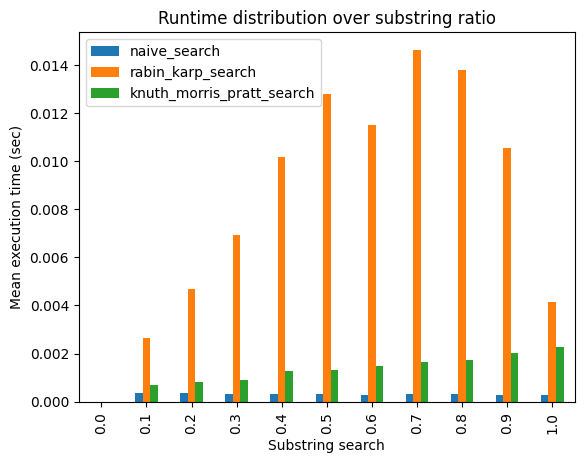

In [6]:
plot_distr_by_substring_ratio(benchmark_results=benchmark_results)